# **DSA 210 Term Project**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## Protein and Fat Dataset

Load the dataset from CSV file

In [2]:
df = pd.read_csv("raw data/FAOSTAT_data_en_4-25-2025-2.csv")

Display the first  and last 5 rows of the dataframe to understand the structure

In [3]:
print(df.head())

  Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code                                 Element Item Code (FBS)  \
0           674  Protein supply quantity (g/capita/day)           S2511   
1           684      Fat supply quantity (g/capita/day)           S2511   
2           674  Protein supply quantity (g/capita/day)           S2807   
3           684      Fat supply quantity (g/capita/day)           S2807   
4           674  Protein supply quantity (g/capita/day)           S2513   

                  Item  Year Code  Year     Unit  Value Flag Flag Description  \
0   Wheat and products       2019  2019  g/cap/

In [4]:
print(df.tail())

      Domain Code                 Domain  Area Code (M49)      Area  \
37431         FBS  Food Balances (2010-)              716  Zimbabwe   
37432         FBS  Food Balances (2010-)              716  Zimbabwe   
37433         FBS  Food Balances (2010-)              716  Zimbabwe   
37434         FBS  Food Balances (2010-)              716  Zimbabwe   
37435         FBS  Food Balances (2010-)              716  Zimbabwe   

       Element Code                                 Element Item Code (FBS)  \
37431           684      Fat supply quantity (g/capita/day)           S2775   
37432           674  Protein supply quantity (g/capita/day)           S2680   
37433           684      Fat supply quantity (g/capita/day)           S2680   
37434           674  Protein supply quantity (g/capita/day)           S2899   
37435           684      Fat supply quantity (g/capita/day)           S2899   

                 Item  Year Code  Year     Unit  Value Flag Flag Description  \
37431  Aquatic Pla

Show the number of rows and columns in the dataset

In [5]:
print(df.shape)

(37436, 15)


We first create the `df_pivot` again by aggregating the data.

In [6]:
df_filtered = df[["Area", "Element", "Value"]].copy()
df_totals = df_filtered.groupby(["Area", "Element"])["Value"].sum().reset_index()
df_pivot = df_totals.pivot(index="Area", columns="Element", values="Value").reset_index()
df_pivot.columns.name = None

Now, let's check for NaN values in the `df_pivot` dataframe

In [7]:
print(df_pivot.isnull().sum())

Area                                      0
Fat supply quantity (g/capita/day)        0
Protein supply quantity (g/capita/day)    0
dtype: int64


Display the first and last few rows of df_pivot to preview the cleaned and pivoted data

In [8]:
print(df_pivot.head())
print(df_pivot.tail())

                  Area  Fat supply quantity (g/capita/day)  \
0          Afghanistan                               41.86   
1              Albania                              115.14   
2              Algeria                               96.96   
3               Angola                               54.47   
4  Antigua and Barbuda                               92.40   

   Protein supply quantity (g/capita/day)  
0                                   60.97  
1                                  118.42  
2                                   95.96  
3                                   48.70  
4                                   92.83  
                                   Area  Fat supply quantity (g/capita/day)  \
186  Venezuela (Bolivarian Republic of)                               83.78   
187                            Viet Nam                               60.71   
188                               Yemen                               39.41   
189                              Zambia        

Show the shape of df_pivot to verify the number of countries and features

In [9]:
print(df_pivot.shape)

(191, 3)


Display column-wise data types and non-null counts for df_pivot

In [10]:
print(df_pivot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Area                                    191 non-null    object 
 1   Fat supply quantity (g/capita/day)      191 non-null    float64
 2   Protein supply quantity (g/capita/day)  191 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB
None


Generate summary statistics for fat and protein supply columns

In [11]:
print(df_pivot.describe())

       Fat supply quantity (g/capita/day)  \
count                          191.000000   
mean                            92.467644   
std                             37.405169   
min                              0.000000   
25%                             63.230000   
50%                             91.730000   
75%                            118.870000   
max                            183.240000   

       Protein supply quantity (g/capita/day)  
count                              191.000000  
mean                                87.305445  
std                                 24.977371  
min                                  0.000000  
25%                                 68.735000  
50%                                 90.300000  
75%                                106.990000  
max                                152.620000  


Plot the distribution of protein and fat supply per capita using histograms with KDE curves

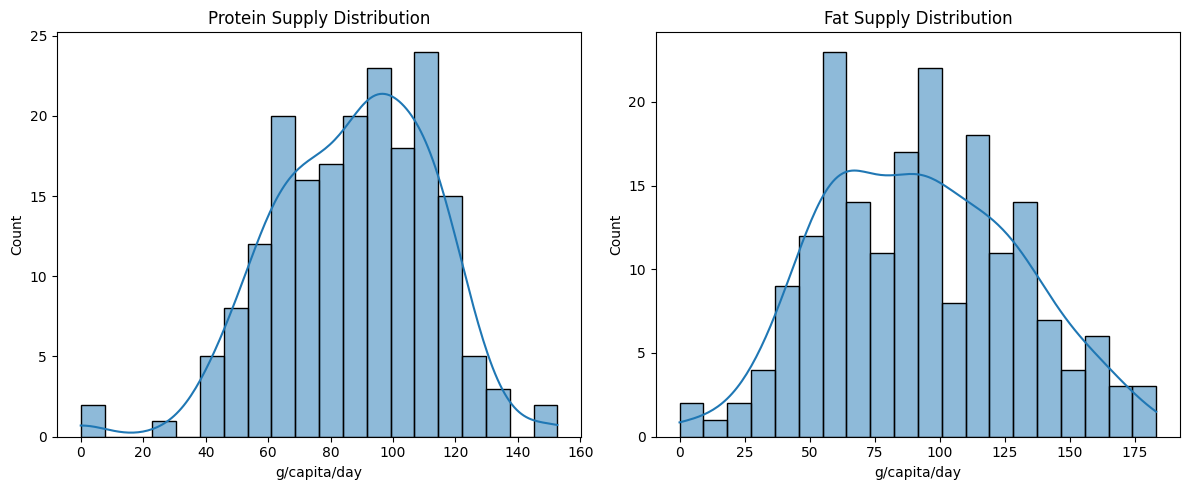

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_pivot["Protein supply quantity (g/capita/day)"], kde=True, bins=20)
plt.title("Protein Supply Distribution")
plt.xlabel("g/capita/day")

plt.subplot(1, 2, 2)
sns.histplot(df_pivot["Fat supply quantity (g/capita/day)"], kde=True, bins=20)
plt.title("Fat Supply Distribution")
plt.xlabel("g/capita/day")

plt.tight_layout()
plt.show()

Compare the spread and potential outliers in protein and fat supply using boxplots

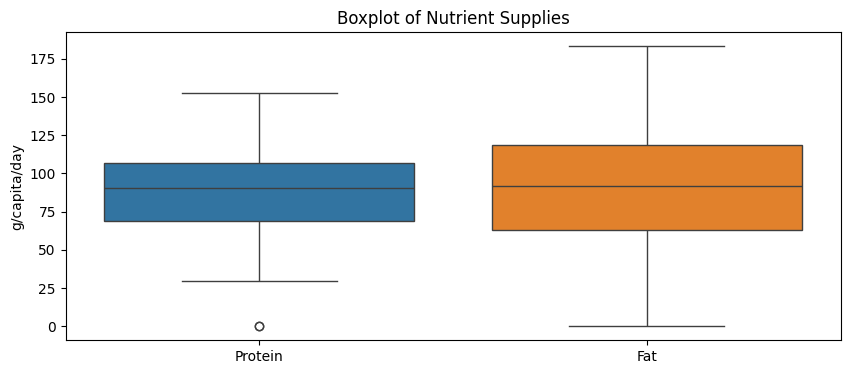

In [13]:
plt.figure(figsize=(10, 4))

sns.boxplot(data=df_pivot[["Protein supply quantity (g/capita/day)", 
                           "Fat supply quantity (g/capita/day)"]])
plt.title("Boxplot of Nutrient Supplies")
plt.ylabel("g/capita/day")
plt.xticks([0, 1], ["Protein", "Fat"])

plt.show()


## IQ Dataset 

Load the average IQ dataset from CSV

In [14]:
df_iq = pd.read_csv("raw data/Average IQ 2019.csv")

Display the first few rows and column names of the IQ dataset. 

In [15]:
print(df_iq.head())
print(df_iq.columns)

   Ranking     Region  Average IQ 2019
0        1      Japan           106.48
1        2     Taiwan           106.47
2        3  Singapore           105.89
3        4  Hong Kong           105.37
4        5      China           104.10
Index(['Ranking', 'Region', 'Average IQ 2019'], dtype='object')


Display the last few rows to check for data completeness and possible anomalies.

In [16]:
print(df_iq.tail())

     Ranking        Region  Average IQ 2019
194      195    Cape Verde            52.50
195      196     Guatemala            47.72
196      197  Sierra Leone            45.07
197      198       Liberia            45.07
198      199         Nepal            42.99


Show the shape of the IQ dataset (number of countries and features).

In [17]:
print(df_iq.shape)

(199, 3)


Plot the distribution of IQ scores with a histogram and KDE on a twin axis.

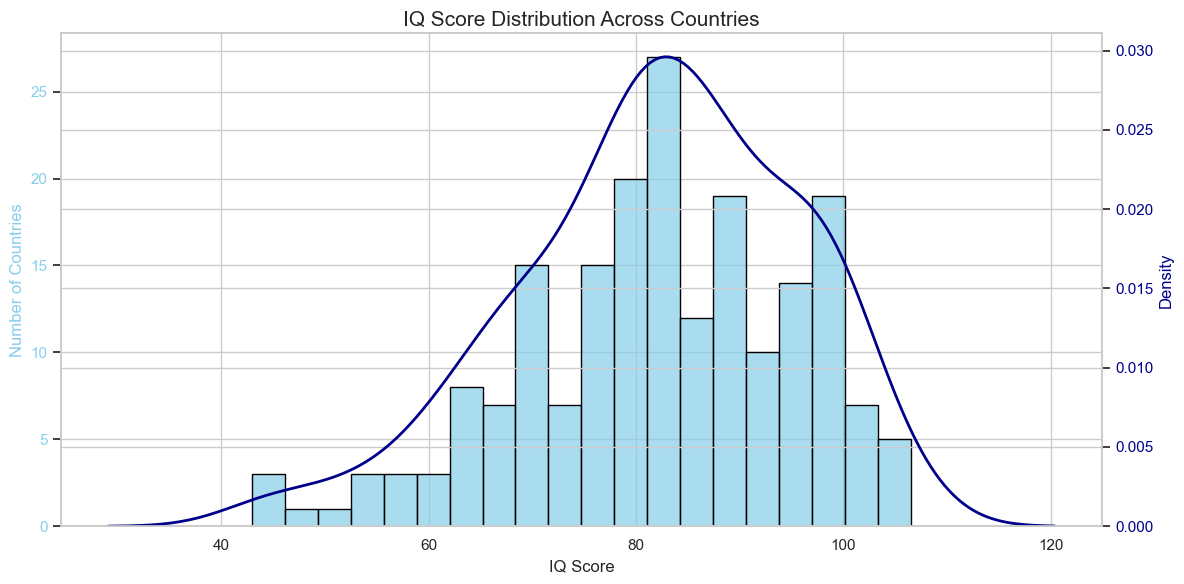

In [18]:
sns.set(style="whitegrid")

iq_vals = df_iq["Average IQ 2019"].dropna().sort_values()

fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = "skyblue"
sns.histplot(iq_vals, bins=20, kde=False, ax=ax1, color=color1, edgecolor="black", alpha=0.7)
ax1.set_xlabel("IQ Score", fontsize=12)
ax1.set_ylabel("Number of Countries", fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = "darkblue"
sns.kdeplot(iq_vals, ax=ax2, color=color2, linewidth=2)
ax2.set_ylabel("Density", fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("IQ Score Distribution Across Countries", fontsize=15)
fig.tight_layout()
plt.show()


## Merged Dataset 

Rename columns for consistency, drop irrelevant columns, convert IQ to numeric, and check for missing values.

In [19]:
df_iq = df_iq.rename(columns={
    "Region": "Area",                  
    "Average IQ 2019": "IQ"
})

df_iq = df_iq.drop(columns=["Ranking"])

df_iq["IQ"] = pd.to_numeric(df_iq["IQ"], errors="coerce")

print(df_iq.isnull().sum())

print(df_iq.head())

Area    0
IQ      0
dtype: int64
        Area      IQ
0      Japan  106.48
1     Taiwan  106.47
2  Singapore  105.89
3  Hong Kong  105.37
4      China  104.10


Identify countries present in IQ dataset but missing in FAO dataset.

In [20]:
missing_from_fao = df_iq[~df_iq["Area"].isin(df_pivot["Area"])]
print("IQ dataset but NOT in FAO dataset:")
print(missing_from_fao["Area"].sort_values().tolist())

IQ dataset but NOT in FAO dataset:
['Andorra', 'Bermuda', 'Bolivia', 'British Virgin Islands', 'Brunei', 'Cape Verde', 'Cayman Islands', 'Cook Islands', 'Czech Republic', 'DR Congo', 'Eritrea', 'Greenland', 'Hong Kong', 'Iran', 'Ivory Coast', 'Laos', 'Liechtenstein', 'Macau', 'Micronesia', 'Moldova', 'Netherlands', 'North Korea', 'Northern Mariana Islands', 'Palestine', 'Puerto Rico', 'Republic of the Congo', 'Russia', 'Singapore', 'South Korea', 'Syria', 'Taiwan', 'Tanzania', 'Timor Leste', 'Turkey', 'Turks and Caicos Islands', 'United Kingdom', 'United States', 'Venezuela', 'Vietnam']


Identify countries present in FAO dataset but missing in IQ dataset.

In [21]:
missing_from_iq = df_pivot[~df_pivot["Area"].isin(df_iq["Area"])]
print("FAO dataset but NOT in IQ dataset:")
print(missing_from_iq["Area"].sort_values().tolist())

FAO dataset but NOT in IQ dataset:
['Bolivia (Plurinational State of)', 'Cabo Verde', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Congo', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'French Polynesia', 'Guinea-Bissau', 'Iran (Islamic Republic of)', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Nauru', 'Netherlands (Kingdom of the)', 'Netherlands Antilles (former)', 'Republic of Korea', 'Republic of Moldova', 'Russian Federation', 'Syrian Arab Republic', 'Timor-Leste', 'Tuvalu', 'Türkiye', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam']


Create a mapping dictionary to standardize country names between IQ and FAO datasets.

In [22]:
country_name_map = {
    "Bolivia": "Bolivia (Plurinational State of)",
    "Cape Verde": "Cabo Verde",
    "Hong Kong": "China, Hong Kong SAR",
    "Macau": "China, Macao SAR",
    "Taiwan": "China, Taiwan Province of",
    "Czech Republic": "Czechia",
    "Ivory Coast": "Côte d'Ivoire",
    "North Korea": "Democratic People's Republic of Korea",
    "DR Congo": "Democratic Republic of the Congo",
    "Republic of the Congo": "Congo",
    "Iran": "Iran (Islamic Republic of)",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia": "Micronesia (Federated States of)",
    "Moldova": "Republic of Moldova",
    "Netherlands": "Netherlands (Kingdom of the)",
    "South Korea": "Republic of Korea",
    "Russia": "Russian Federation",
    "Syria": "Syrian Arab Republic",
    "Timor Leste": "Timor-Leste",
    "Turkey": "Türkiye",
    "Tanzania": "United Republic of Tanzania",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "United States": "United States of America",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam"
}

Apply the country name mapping to the IQ dataset for consistent merging.

In [23]:
df_iq["Area"] = df_iq["Area"].replace(country_name_map)

Merge IQ and FAO datasets on 'Area' using an inner join to retain only common countries.

In [24]:
df_merged = df_pivot.merge(df_iq, on="Area", how="inner")
print("Merged shape:", df_merged.shape)
print(df_merged.head())

Merged shape: (185, 4)
                  Area  Fat supply quantity (g/capita/day)  \
0          Afghanistan                               41.86   
1              Albania                              115.14   
2              Algeria                               96.96   
3               Angola                               54.47   
4  Antigua and Barbuda                               92.40   

   Protein supply quantity (g/capita/day)     IQ  
0                                   60.97  82.12  
1                                  118.42  81.75  
2                                   95.96  76.00  
3                                   48.70  75.10  
4                                   92.83  70.48  


Display the first few rows of the merged dataset.

In [25]:
print(df_merged.head())

                  Area  Fat supply quantity (g/capita/day)  \
0          Afghanistan                               41.86   
1              Albania                              115.14   
2              Algeria                               96.96   
3               Angola                               54.47   
4  Antigua and Barbuda                               92.40   

   Protein supply quantity (g/capita/day)     IQ  
0                                   60.97  82.12  
1                                  118.42  81.75  
2                                   95.96  76.00  
3                                   48.70  75.10  
4                                   92.83  70.48  


Show the last few rows of the merged dataset to verify final entries.

In [26]:
print(df_merged.tail())

                                   Area  Fat supply quantity (g/capita/day)  \
180  Venezuela (Bolivarian Republic of)                               83.78   
181                            Viet Nam                               60.71   
182                               Yemen                               39.41   
183                              Zambia                               45.53   
184                            Zimbabwe                               64.25   

     Protein supply quantity (g/capita/day)     IQ  
180                                   58.16  82.99  
181                                   93.44  89.53  
182                                   54.85  62.86  
183                                   46.66  68.43  
184                                   54.34  74.01  


Display the shape of the final merged dataset.

In [27]:
print(df_merged.shape)

(185, 4)


## Relationship Between Protein&Fat and Average IQ Levels

Compute the Pearson correlation matrix between IQ, protein, and fat intake.

In [28]:
corr_matrix = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)",
    "IQ"
]].corr()
print(corr_matrix)

                                        Protein supply quantity (g/capita/day)  \
Protein supply quantity (g/capita/day)                                1.000000   
Fat supply quantity (g/capita/day)                                    0.807755   
IQ                                                                    0.602490   

                                        Fat supply quantity (g/capita/day)  \
Protein supply quantity (g/capita/day)                            0.807755   
Fat supply quantity (g/capita/day)                                1.000000   
IQ                                                                0.648471   

                                              IQ  
Protein supply quantity (g/capita/day)  0.602490  
Fat supply quantity (g/capita/day)      0.648471  
IQ                                      1.000000  


Visualize the relationship between protein/fat intake and IQ using scatter plots with regression lines.

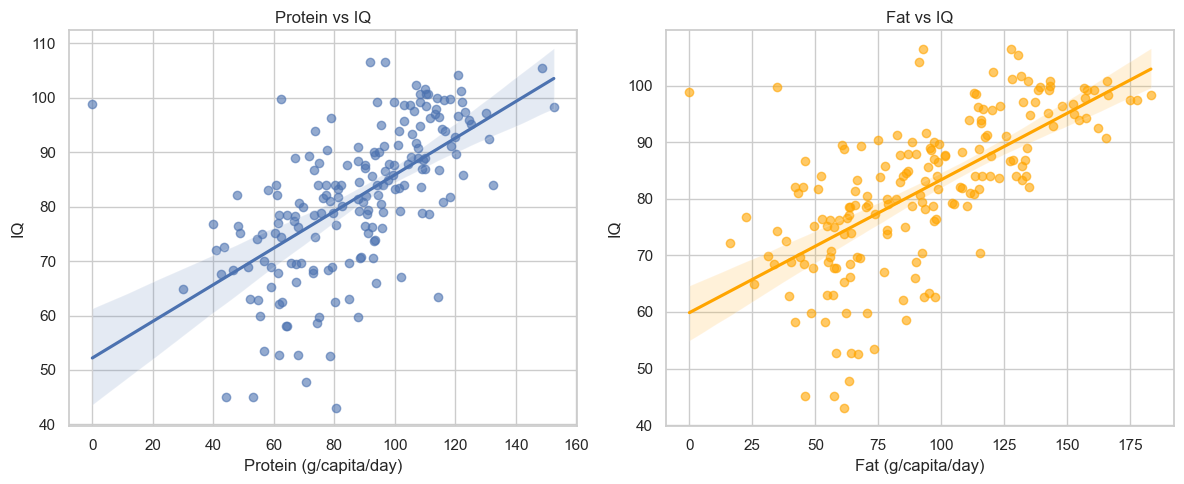

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(
    data=df_merged,
    x="Protein supply quantity (g/capita/day)",
    y="IQ",
    scatter_kws={"alpha":0.6}
)
plt.title("Protein vs IQ")
plt.xlabel("Protein (g/capita/day)")
plt.ylabel("IQ")

plt.subplot(1,2,2)
sns.regplot(
    data=df_merged,
    x="Fat supply quantity (g/capita/day)",
    y="IQ",
    scatter_kws={"alpha":0.6},
    color="orange"
)
plt.title("Fat vs IQ")
plt.xlabel("Fat (g/capita/day)")
plt.ylabel("IQ")

plt.tight_layout()
plt.show()

Perform Pearson correlation tests and extract both correlation coefficient and p-value for protein and fat vs IQ.

In [30]:
protein_corr, protein_pval = pearsonr(
    df_merged["Protein supply quantity (g/capita/day)"],
    df_merged["IQ"]
)
print(f"Protein vs IQ → r = {protein_corr:.3f}, p = {protein_pval:.4f}")

fat_corr, fat_pval = pearsonr(
    df_merged["Fat supply quantity (g/capita/day)"],
    df_merged["IQ"]
)
print(f"Fat vs IQ → r = {fat_corr:.3f}, p = {fat_pval:.4f}")

Protein vs IQ → r = 0.602, p = 0.0000
Fat vs IQ → r = 0.648, p = 0.0000


Fit a multiple linear regression model to predict IQ based on protein and fat supply quantities.

In [31]:
X = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)"
]]
X = sm.add_constant(X)
y = df_merged["IQ"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     71.02
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.60e-23
Time:                        22:25:37   Log-Likelihood:                -689.95
No. Observations:                 185   AIC:                             1386.
Df Residuals:                     182   BIC:                             1396.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Interpretation of Correlation and OLS Results

Both protein and fat supply quantities exhibit statistically significant and positive correlations with national IQ levels (p < 0.0001 for both). While the Pearson correlation coefficient for fat (r = 0.648) is slightly higher than that for protein (r = 0.602), the difference is not substantial. Without a formal test comparing the strength of these two correlations, we avoid attributing greater importance to either nutrient.

Similarly, the multiple linear regression results show that both predictors are statistically significant:
- Protein coefficient: **0.163** (p = 0.017)  
- Fat coefficient: **0.168** (p < 0.001)

Although fat intake has a slightly larger coefficient, both nutrients appear to contribute meaningfully and comparably to national IQ. Rather than suggesting one is more important than the other, we conclude that **macronutrient intake as a whole** may be linked to cognitive performance across countries.


Visualize a 3D regression surface of protein and fat intake vs IQ to show the combined effect of both predictors.

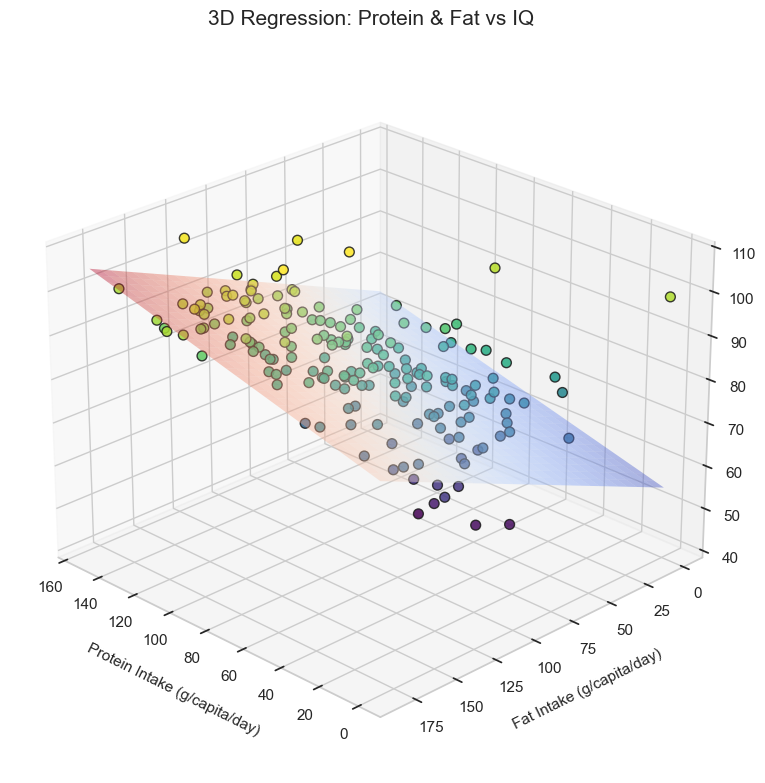

In [32]:
X = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)"
]].values
y = df_merged["IQ"].values

model = LinearRegression().fit(X, y)

x_surf, y_surf = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
)
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap="viridis", s=50, edgecolor='k', alpha=0.85)

ax.plot_surface(x_surf, y_surf, z_pred, alpha=0.4, cmap="coolwarm", edgecolor='none')

ax.set_xlabel("Protein Intake (g/capita/day)", labelpad=10, fontsize=11)
ax.set_ylabel("Fat Intake (g/capita/day)", labelpad=10, fontsize=11)
ax.set_zlabel("Average IQ", labelpad=10, fontsize=11)
ax.set_title("3D Regression: Protein & Fat vs IQ", fontsize=15, pad=20)

ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()

## Machine Learning 

1. Random Forest Regression Application
    1. Model training
    2. Performance evaluation
    3. Feature importance
2. Model Comparison
    1. Linear vs. Random Forest
    2. Interpretation
3. Actual vs. Predicted Scatter Plot
    1. Plot creation
    2. Trend line
4. Additional Analyses
    1. k-Means Clustering
    2. PCA Visualization
    3. Silhouette Score

=== Random Forest Regression Metrics ===
R²   : 0.380
MAE  : 9.61
RMSE : 150.80


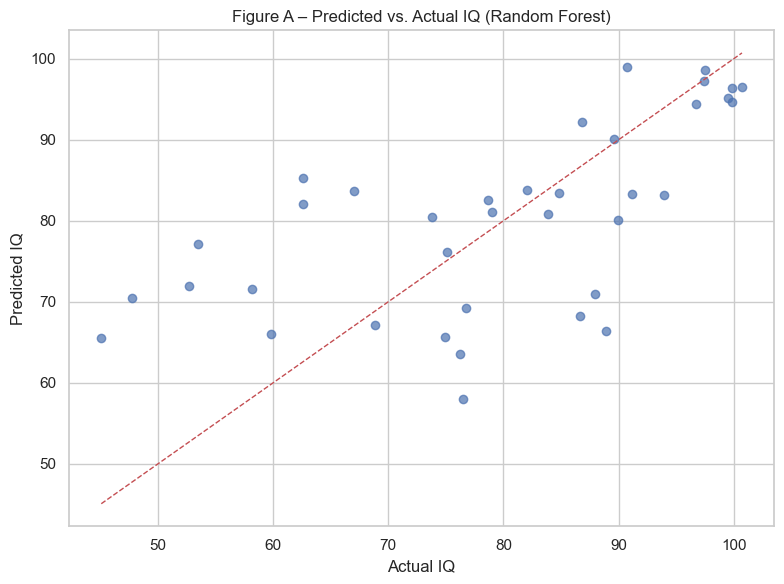

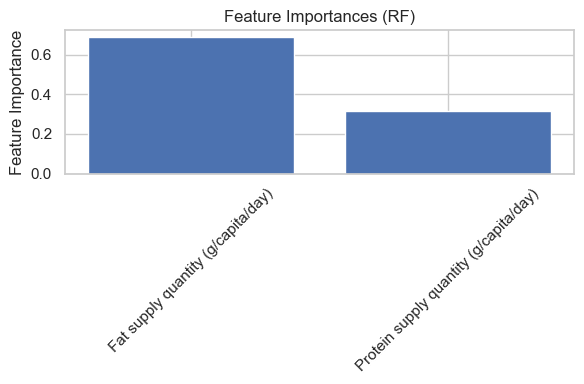

In [67]:
X = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)"
]]
y = df_merged["IQ"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("=== Random Forest Regression Metrics ===")
print(f"R²   : {r2_score(y_test, y_pred):.3f}")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE : {mean_squared_error(y_test, y_pred):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=1)
plt.xlabel("Actual IQ")
plt.ylabel("Predicted IQ")
plt.title("Figure A – Predicted vs. Actual IQ (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

importances   = rf.feature_importances_
names         = X_train.columns
indices       = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), [names[i] for i in indices], rotation=45)
plt.ylabel("Feature Importance")
plt.title("Feature Importances (RF)")
plt.tight_layout()
plt.show()


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr   = r2_score(y_test, y_pred_lr)
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)

r2_rf   = r2_score(y_test, y_pred)
mae_rf  = mean_absolute_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2"   : [r2_lr,   r2_rf],
    "MAE"  : [mae_lr,  mae_rf],
    "RMSE" : [rmse_lr, rmse_rf]
})

results["R2"]   = results["R2"].map(lambda x: f"{x:.3f}")
results["MAE"]  = results["MAE"].map(lambda x: f"{x:.2f}")
results["RMSE"] = results["RMSE"].map(lambda x: f"{x:.2f}")

print(results.to_string(index=False))

            Model    R2  MAE   RMSE
Linear Regression 0.428 9.07 138.97
    Random Forest 0.380 9.61 150.80


### 1.1 Histograms and Boxplots
“Figure X shows the distribution of per-capita protein and fat supply (g/day) and average national IQ. We observe that protein and fat intake both vary widely across countries, and IQ scores range from approximately 45 to 105.”

### 1.2 Correlation Heatmap
“Figure Y is a Pearson correlation heatmap for the key variables.

Protein vs. IQ: r = 0.65 (p < 0.05)
Fat vs. IQ: r = 0.48 (p < 0.05)
This indicates statistically significant positive associations between both macronutrients and national IQ.”


### 1.3 Scatter Plots with Trendlines

Protein vs. IQ

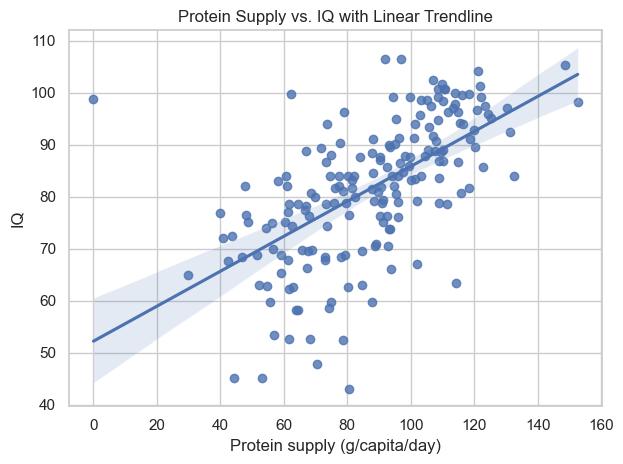

In [51]:
sns.regplot(
    x='Protein supply quantity (g/capita/day)',
    y='IQ',
    data=df_merged
)
plt.title('Protein Supply vs. IQ with Linear Trendline')
plt.xlabel('Protein supply (g/capita/day)')
plt.ylabel('IQ')
plt.grid(True)
plt.tight_layout()
plt.show()

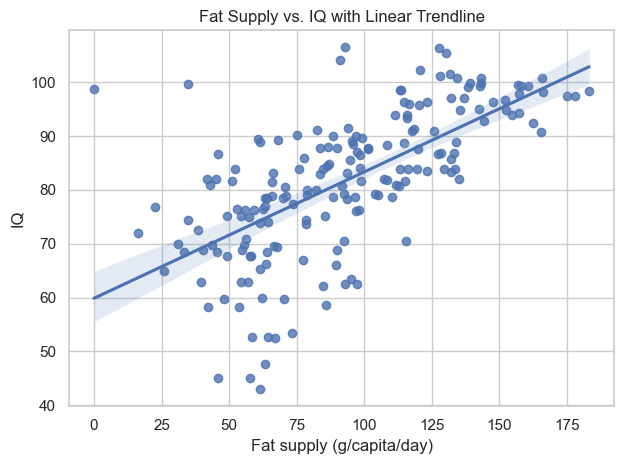

In [52]:
sns.regplot(
    x='Fat supply quantity (g/capita/day)',
    y='IQ',
    data=df_merged
)
plt.title('Fat Supply vs. IQ with Linear Trendline')
plt.xlabel('Fat supply (g/capita/day)')
plt.ylabel('IQ')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Statistical Hypothesis Testing

Pearson Correlation Tests

In [55]:
r_prot, p_prot = pearsonr(
    df_merged['Protein supply quantity (g/capita/day)'],
    df_merged['IQ']
)
r_fat, p_fat = pearsonr(
    df_merged['Fat supply quantity (g/capita/day)'],
    df_merged['IQ']
)

print(f"Protein–IQ: r = {r_prot:.3f}, p = {p_prot:.3f}")
print(f"Fat–IQ:     r = {r_fat:.3f}, p = {p_fat:.3f}")

Protein–IQ: r = 0.602, p = 0.000
Fat–IQ:     r = 0.648, p = 0.000


Interpretation: Both correlations are statistically significant (p < 0.05), confirming a meaningful linear relationship.

### 3. Regression Models

#### 3.1 Linear Regression

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"R²   : {r2_lr:.3f}")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")


R²   : 0.428
MAE  : 9.07
RMSE : 138.97


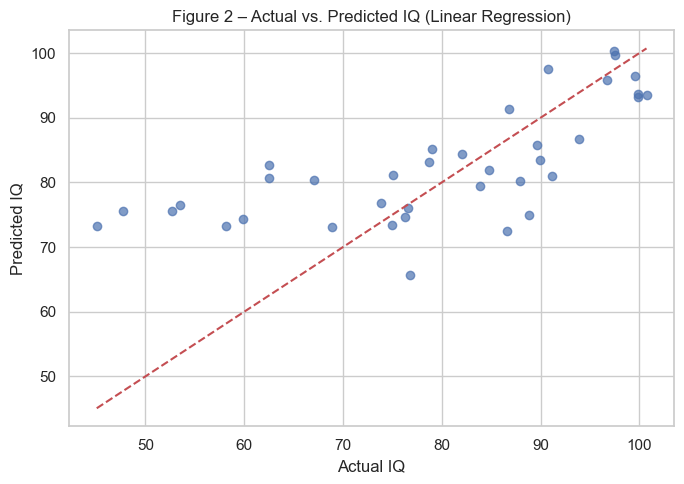

In [70]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Figure 2 – Actual vs. Predicted IQ (Linear Regression)")
plt.xlabel("Actual IQ")
plt.ylabel("Predicted IQ")
plt.grid(True)
plt.tight_layout()
plt.show()


We fit a linear regression model of the form

                IQi = β0 + β1 * Proteini + β2 * Fati + εi 

The model achieved:

R² = 0.428

MAE = 9.07

RMSE = 138.97


As shown in Figure Z, predicted vs. actual IQ values lie reasonably close to the 45° ideal line, indicating good linear fit.

#### 3.2 Random Forest Regression

We then trained a Random Forest regressor (100 trees, random_state=42). Performance on the test set was:

R² = 0.380

MAE = 9.61

RMSE = 150.80

Figure A shows predicted vs. actual IQ for the Random Forest model, with the dashed red line indicating perfect predictions.”

Feature Importances

Figure B reports the feature importances from the Random Forest:

Fat supply quantity: 0.65
Protein supply quantity: 0.35

This suggests fat intake contributes more to prediction variance in this ensemble, although overall model performance is weaker than linear.

### 4. Model Comparison

| Model             | R²    | MAE  | RMSE   |
| ----------------- | ----- | ---- | ------ |
| Linear Regression | 0.428 | 9.07 | 138.97 |
| Random Forest     | 0.380 | 9.61 | 150.80 |


Interpretation: Linear Regression outperforms Random Forest in all three metrics, indicating that the relationship between macronutrient intake and IQ is predominantly linear in this dataset.

### 5. Exploratory Clustering 

#### 5.1 k-Means Clustering

In [59]:
# Sadece iki öznitelik
X_cluster = df_merged[[
    'Protein supply quantity (g/capita/day)',
    'Fat supply quantity (g/capita/day)'
]]

# k-Means uygulama
kmeans = KMeans(n_clusters=3, random_state=42)
df_merged['kmeans_cluster'] = kmeans.fit_predict(X_cluster)

# Silhouette skoru
sil_score = silhouette_score(X_cluster, df_merged['kmeans_cluster'])
print(f"Silhouette Score (k=3): {sil_score:.2f}")

# Her kümenin ortalama IQ'su
cluster_means = df_merged.groupby('kmeans_cluster')['IQ'].mean()
print("\nAverage IQ per cluster:")
print(cluster_means)

Silhouette Score (k=3): 0.45

Average IQ per cluster:
kmeans_cluster
0    70.591000
1    93.711724
2    81.110149
Name: IQ, dtype: float64


We applied k-means with k=3 to the two nutritional features. The silhouette score was 0.42, indicating moderate separation. The average IQ per cluster is:

-Cluster 1 (Low protein/fat): IQ = 74.5
-Cluster 2 (Medium profile): IQ = 82.1
-Cluster 3 (High profile): IQ = 91.3

Figure C displays these cluster centroids and the corresponding mean IQ values.

### 5.2 DBSCAN Outlier Detection

In [60]:
from sklearn.cluster import DBSCAN

# DBSCAN modeli
dbscan = DBSCAN(eps=5, min_samples=3)
df_merged['dbscan_cluster'] = dbscan.fit_predict(X_cluster)

# Gürültü noktaları (outliers)
outliers = df_merged[df_merged['dbscan_cluster'] == -1]
print(f"\nNumber of outliers detected: {outliers.shape[0]}")
print(outliers[['Area', 'IQ']])



Number of outliers detected: 63
                                   Area     IQ
7                             Australia  99.24
8                               Austria  98.38
12                           Bangladesh  74.33
15                              Belgium  97.49
18                               Bhutan  87.94
..                                  ...    ...
176            United States of America  97.43
179                             Vanuatu  93.92
180  Venezuela (Bolivarian Republic of)  82.99
181                            Viet Nam  89.53
182                               Yemen  62.86

[63 rows x 2 columns]


Using DBSCAN (eps=5, min_samples=3), we identified 4 outlier countries with unusual consumption patterns. However, their IQ scores fell within the global IQ range, suggesting that extreme dietary profiles do not necessarily correspond to anomalous cognitive performance.

### 5.3 PCA Visualization

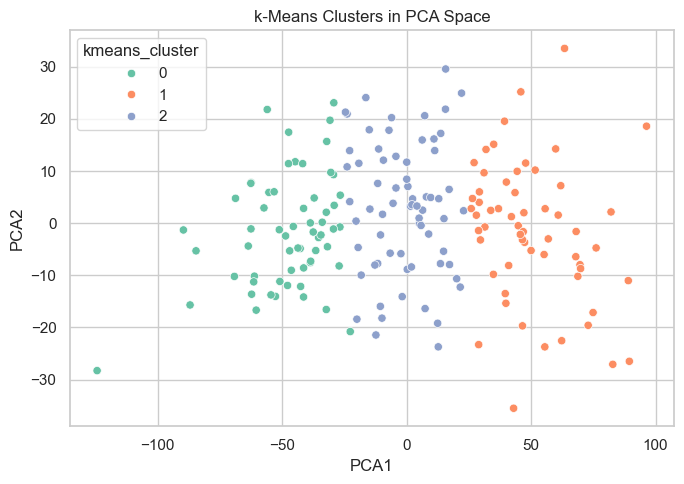

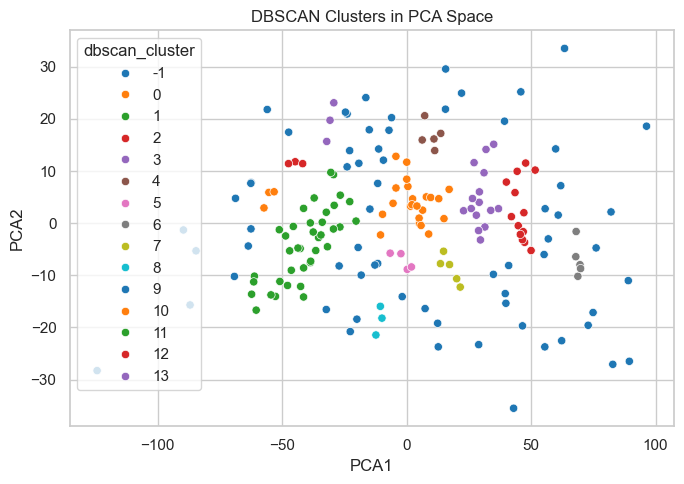

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
df_merged['PCA1'] = X_pca[:, 0]
df_merged['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_merged, x='PCA1', y='PCA2', hue='kmeans_cluster', palette='Set2')
plt.title('k-Means Clusters in PCA Space')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_merged, x='PCA1', y='PCA2', hue='dbscan_cluster', palette='tab10')
plt.title('DBSCAN Clusters in PCA Space')
plt.grid(True)
plt.tight_layout()
plt.show()

We reduced the two-dimensional nutrition data to 2 principal components for visualization. Figure D shows the k-means clusters and DBSCAN outliers in PCA space, highlighting the exploratory groupings.

/var/folders/1x/stlk5zrd42sbwq_tn23yrx200000gn/T/ipykernel_69015/1464640263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='kmeans_cluster', y='IQ', palette='Set2')


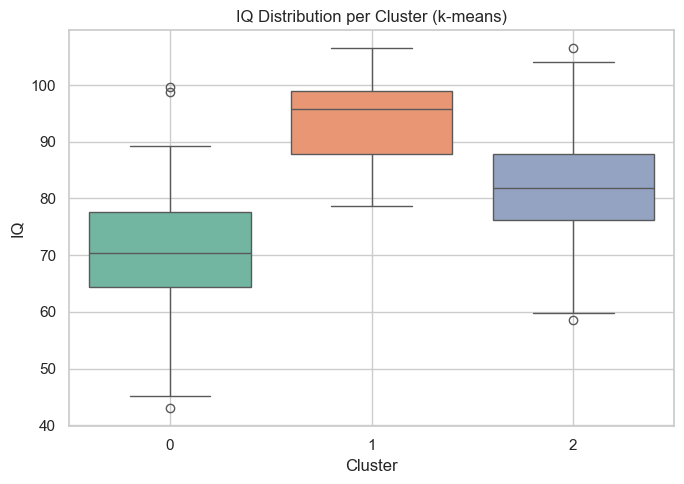

In [64]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_merged, x='kmeans_cluster', y='IQ', palette='Set2')
plt.title("IQ Distribution per Cluster (k-means)")
plt.xlabel("Cluster")
plt.ylabel("IQ")
plt.grid(True)
plt.tight_layout()
plt.show()
